In [1]:
import numpy as np 
import pandas as pd 
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
import matplotlib.pyplot as plt
import seaborn as sns

/kaggle/input/terrorism-data/globalterrorismdb_0718dist.csv
/kaggle/input/sportsanalysis/matches.csv
/kaggle/input/sportsanalysis/deliveries.csv
/kaggle/input/terrorismdata/globalterrorism.csv


In [2]:
df = pd.read_csv('/kaggle/input/sportsanalysis/matches.csv')
df.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [3]:
df.isnull().sum()

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

In [5]:
df[df['winner'] == 'Mumbai Indians'][['season', 'city', 'win_by_runs','win_by_wickets','player_of_match']].head(20) 

,season,city,win_by_runs,win_by_wickets,player_of_match
6,2017,Mumbai,0,4,N Rana
9,2017,Mumbai,0,4,JJ Bumrah
11,2017,Bangalore,0,4,KA Pollard
15,2017,Mumbai,0,6,N Rana
21,2017,Indore,0,8,JC Buttler
23,2017,Mumbai,14,0,MJ McClenaghan
33,2017,Rajkot,0,0,KH Pandya
36,2017,Mumbai,0,5,RG Sharma
43,2017,Delhi,146,0,LMP Simmons
52,2017,Kolkata,9,0,AT Rayudu


In [6]:
df[df['winner'] == 'Chennai Super Kings'][['season', 'city', 'win_by_runs','win_by_wickets','player_of_match']].head(20) 

,season,city,win_by_runs,win_by_wickets,player_of_match
60,2008,Chandigarh,33,0,MEK Hussey
66,2008,Chennai,6,0,ML Hayden
70,2008,Chennai,0,9,JDP Oram
73,2008,Bangalore,13,0,MS Dhoni
86,2008,Delhi,0,4,MS Dhoni
90,2008,Chennai,18,0,L Balaji
102,2008,Kolkata,3,0,M Ntini
113,2008,Hyderabad,0,7,SK Raina
115,2008,Mumbai,0,9,M Ntini
121,2009,Port Elizabeth,92,0,M Muralitharan


In [7]:
df[df['winner'] == 'Royal Challengers Bangalore'][['season', 'city', 'win_by_runs','win_by_wickets','player_of_match']].head(20) 

,season,city,win_by_runs,win_by_wickets,player_of_match
4,2017,Bangalore,15,0,KM Jadhav
19,2017,Rajkot,21,0,CH Gayle
54,2017,Delhi,10,0,HV Patel
62,2008,Mumbai,0,5,MV Boucher
79,2008,Hyderabad,0,5,R Vinay Kumar
106,2008,Chennai,14,0,A Kumble
110,2008,Bangalore,3,0,P Kumar
118,2009,Cape Town,75,0,R Dravid
133,2009,Durban,0,5,MV Boucher
138,2009,Durban,8,0,Yuvraj Singh


In [8]:
def team(x): 
    return df[df['winner'] == x][['season', 'city', 'win_by_runs','win_by_wickets','player_of_match','toss_winner','toss_decision']]

In [9]:
team('Kolkata Knight Riders')

,season,city,win_by_runs,win_by_wickets,player_of_match,toss_winner,toss_decision
2,2017,Rajkot,0,10,CA Lynn,Kolkata Knight Riders,field
10,2017,Kolkata,0,8,SP Narine,Kolkata Knight Riders,field
13,2017,Kolkata,17,0,RV Uthappa,Sunrisers Hyderabad,field
17,2017,Delhi,0,4,NM Coulter-Nile,Delhi Daredevils,bat
26,2017,Kolkata,82,0,NM Coulter-Nile,Royal Challengers Bangalore,field
...,...,...,...,...,...,...,...
701,2019,Kolkata,28,0,AD Russell,Kings XI Punjab,field
712,2019,Bengaluru,0,5,AD Russell,Kolkata Knight Riders,field
716,2019,Jaipur,0,8,H Gurney,Kolkata Knight Riders,field
742,2019,Kolkata,34,0,AD Russell,Mumbai Indians,field


In [10]:
team('Kings XI Punjab')

,season,city,win_by_runs,win_by_wickets,player_of_match,toss_winner,toss_decision
3,2017,Indore,0,6,GJ Maxwell,Kings XI Punjab,field
7,2017,Indore,0,8,AR Patel,Royal Challengers Bangalore,bat
25,2017,Rajkot,26,0,HM Amla,Gujarat Lions,field
34,2017,Chandigarh,0,10,Sandeep Sharma,Kings XI Punjab,field
41,2017,Bangalore,19,0,Sandeep Sharma,Royal Challengers Bangalore,field
...,...,...,...,...,...,...,...
704,2019,Mohali,0,8,MA Agarwal,Kings XI Punjab,field
708,2019,Mohali,14,0,S Curran,Delhi Capitals,field
717,2019,Mohali,0,6,KL Rahul,Kings XI Punjab,field
727,2019,Mohali,12,0,R Ashwin,Rajasthan Royals,field


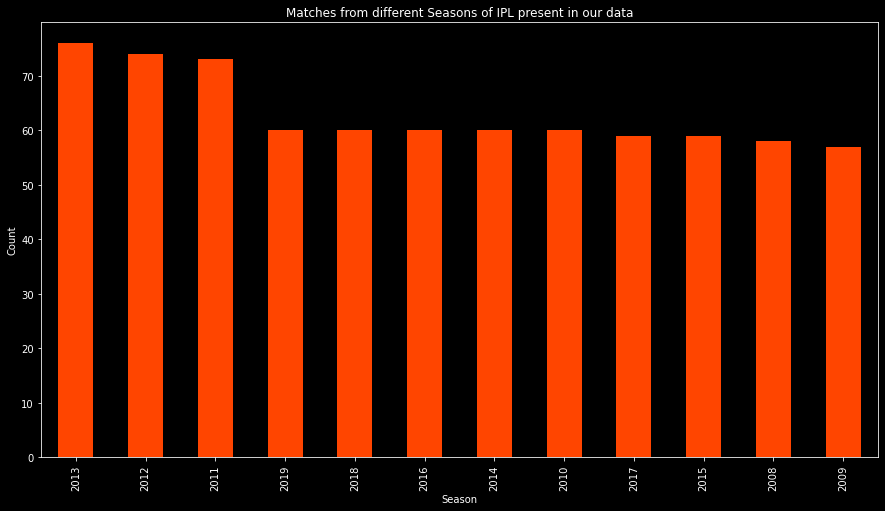

In [11]:
plt.style.use('dark_background') 
plt.figure(figsize = (15,8))
df['season'].value_counts().plot.bar(color = 'orangered')
plt.title('Matches from different Seasons of IPL present in our data')
plt.xlabel('Season')
plt.ylabel('Count')
plt.show()

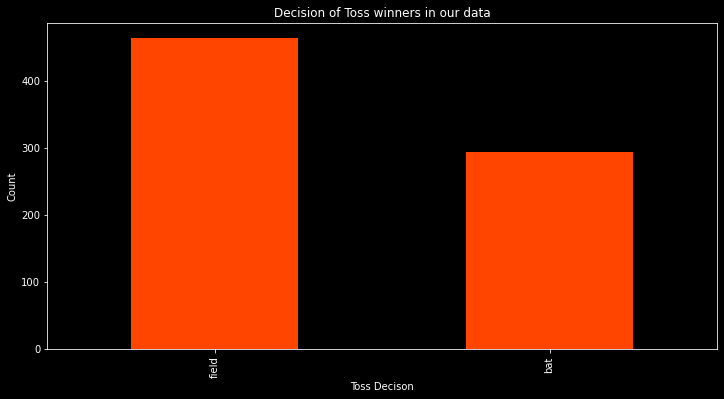

In [12]:
plt.style.use('dark_background') 
plt.figure(figsize = (12,6))
df['toss_decision'].value_counts().plot.bar(color = 'orangered')
plt.title('Decision of Toss winners in our data')
plt.xlabel('Toss Decison')
plt.ylabel('Count')
plt.show()

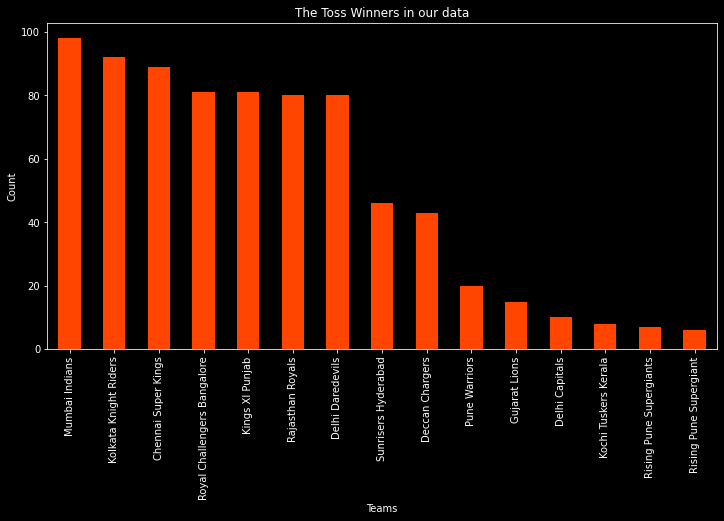

In [13]:
plt.style.use('dark_background') 
plt.figure(figsize = (12,6))
df['toss_winner'].value_counts().plot.bar(color = 'orangered')
plt.title('The Toss Winners in our data')
plt.xlabel('Teams')
plt.ylabel('Count')
plt.show()

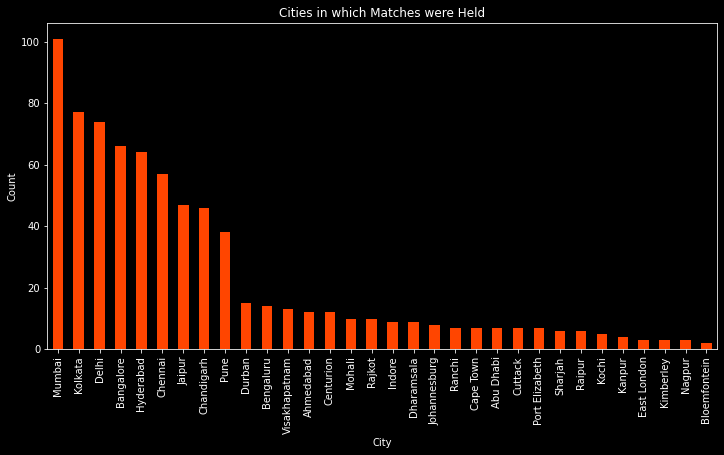

In [14]:
plt.style.use('dark_background') 
plt.figure(figsize = (12,6))
df['city'].value_counts().plot.bar(color = 'orangered')
plt.title('Cities in which Matches were Held')
plt.xlabel('City')
plt.ylabel('Count')
plt.show()

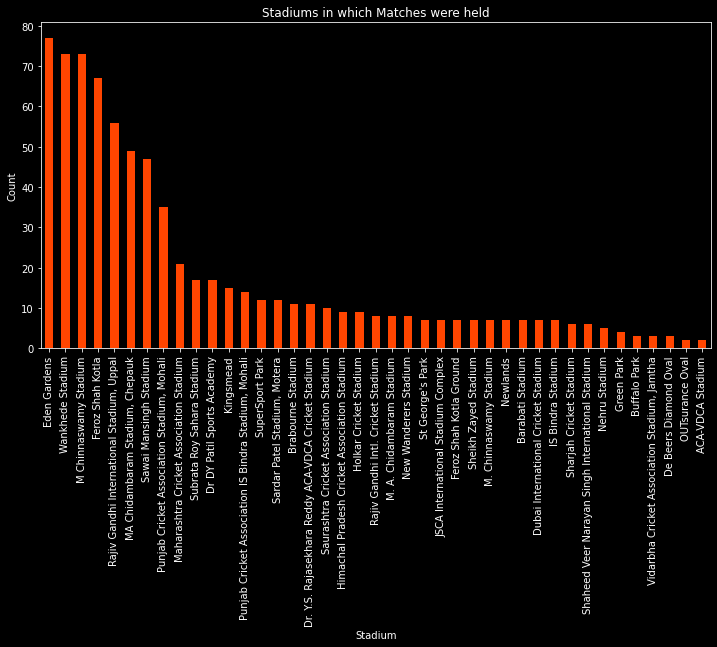

In [15]:
plt.style.use('dark_background') 
plt.figure(figsize = (12,6))
df['venue'].value_counts().plot.bar(color = 'orangered')
plt.title('Stadiums in which Matches were held')
plt.xlabel('Stadium')
plt.ylabel('Count')
plt.show()

In [16]:
df['result'].value_counts().nunique()

3

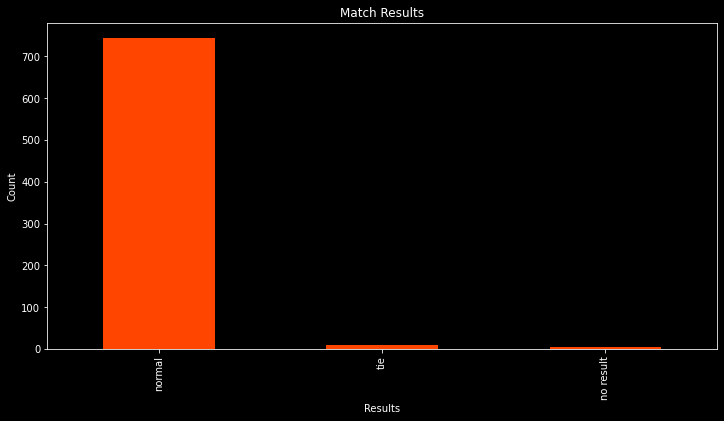

In [17]:
plt.style.use('dark_background') 
plt.figure(figsize = (12,6))
df['result'].value_counts().plot.bar(color = 'orangered')
plt.title('Match Results')
plt.xlabel('Results')
plt.ylabel('Count')
plt.show()

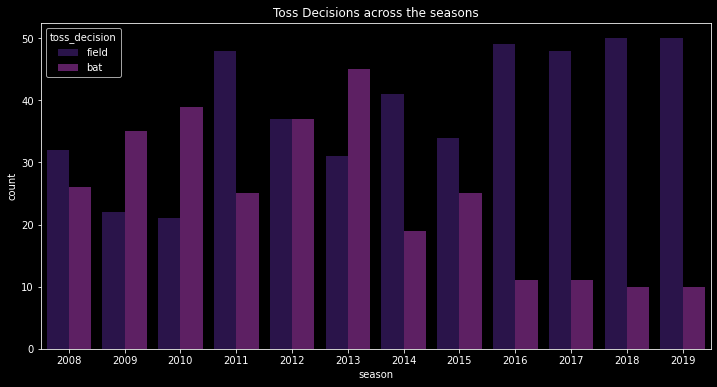

In [18]:
plt.subplots(figsize=(12,6))
sns.countplot(x='season',hue='toss_decision',data=df,palette=sns.color_palette('inferno'))
plt.title("Toss Decisions across the seasons")
plt.show()

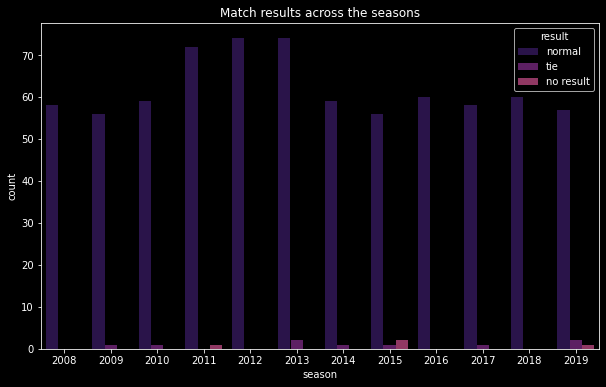

In [19]:
plt.subplots(figsize=(10,6))
sns.countplot(x='season',hue='result',data=df,palette=sns.color_palette('inferno'))
plt.title("Match results across the seasons")
plt.show()

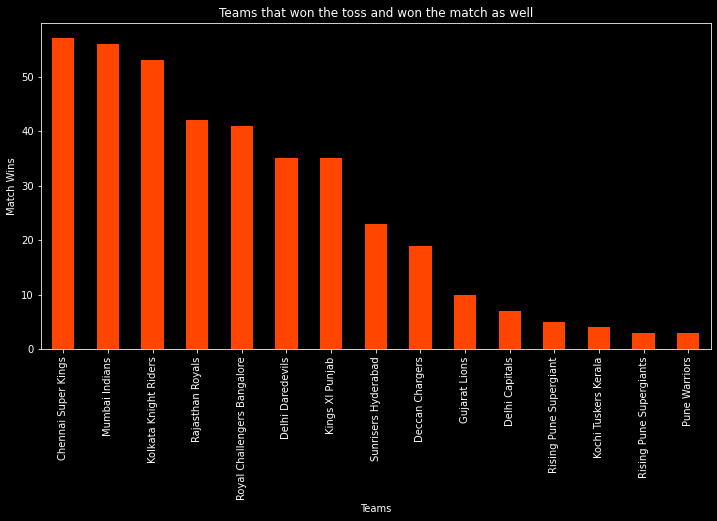

In [20]:
plt.figure(figsize = (12,6))
df.loc[df.toss_winner == df.winner, "winner"].value_counts().plot(kind="bar",color = 'orangered')
plt.title('Teams that won the toss and won the match as well')
plt.xlabel('Teams')
plt.ylabel('Match Wins')
plt.show()

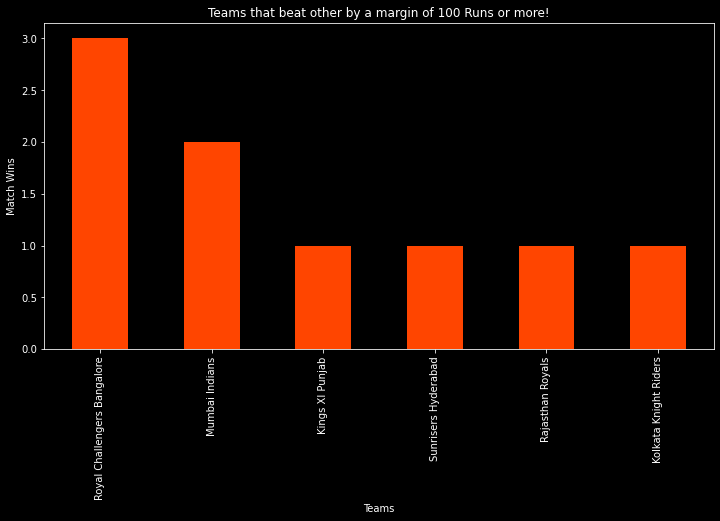

In [21]:
plt.figure(figsize = (12,6))
df.loc[df.win_by_runs > 100, "winner"].value_counts().plot(kind="bar",color = 'orangered')
plt.title('Teams that beat other by a margin of 100 Runs or more!')
plt.xlabel('Teams')
plt.ylabel('Match Wins')
plt.show()

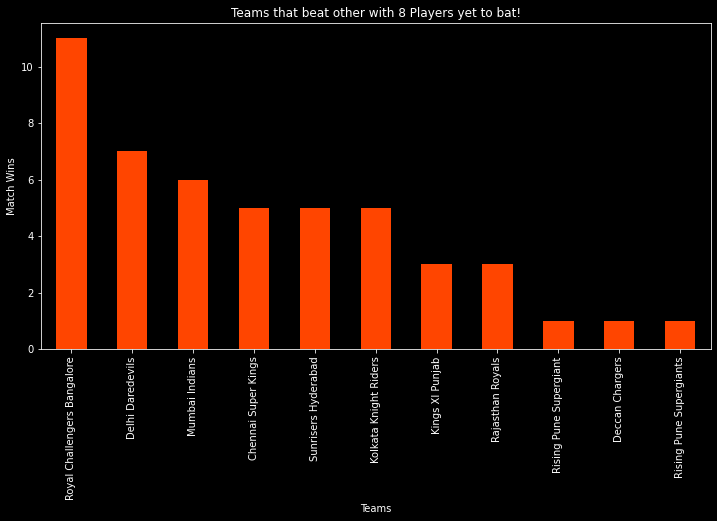

In [22]:
plt.figure(figsize = (12,6))
df.loc[df.win_by_wickets > 8, "winner"].value_counts().plot(kind="bar",color = 'orangered')
plt.title('Teams that beat other with 8 Players yet to bat!')
plt.xlabel('Teams')
plt.ylabel('Match Wins')
plt.show()

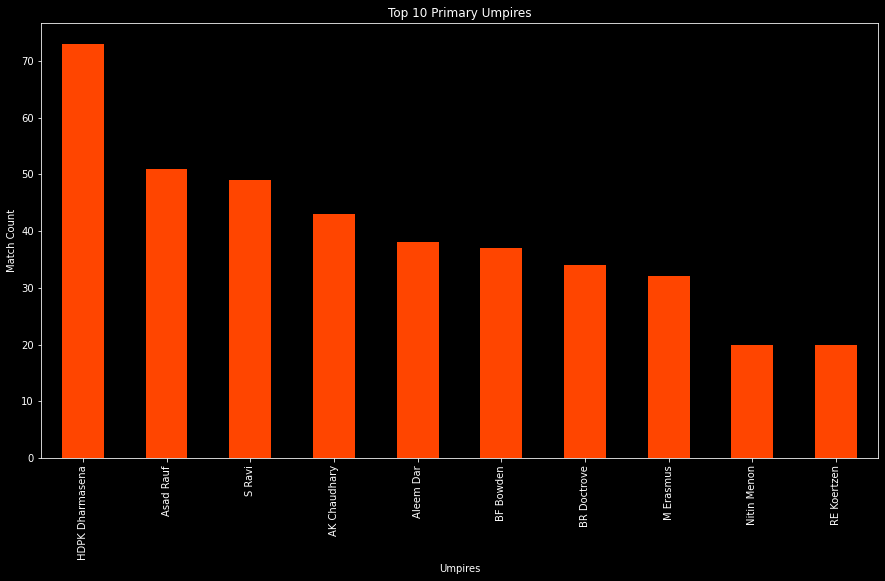

In [23]:
plt.style.use('dark_background') 
plt.figure(figsize = (15,8))
df['umpire1'].value_counts().head(10).plot.bar(color = 'orangered')
plt.title('Top 10 Primary Umpires')
plt.xlabel('Umpires')
plt.ylabel('Match Count')
plt.show()

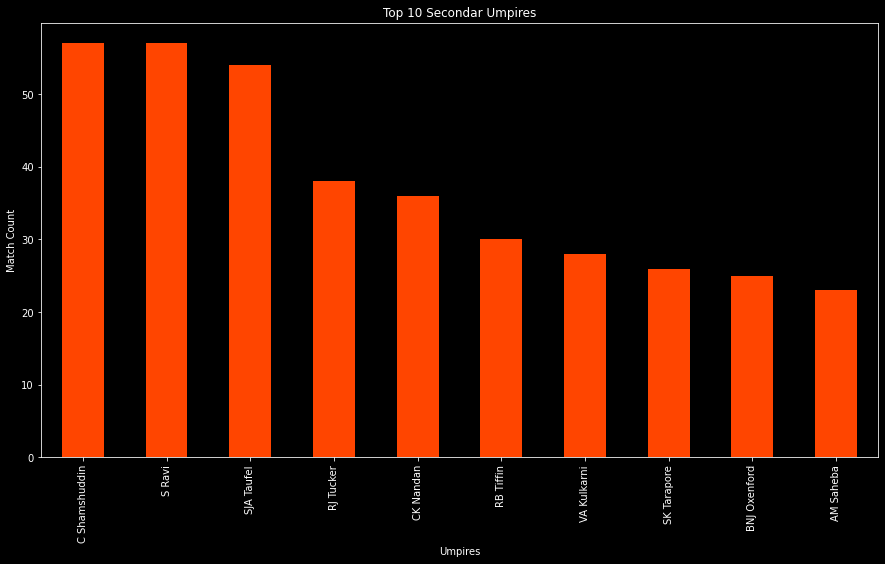

In [24]:
plt.style.use('dark_background') 
plt.figure(figsize = (15,8))
df['umpire2'].value_counts().head(10).plot.bar(color = 'orangered')
plt.title('Top 10 Secondar Umpires')
plt.xlabel('Umpires')
plt.ylabel('Match Count')
plt.show()

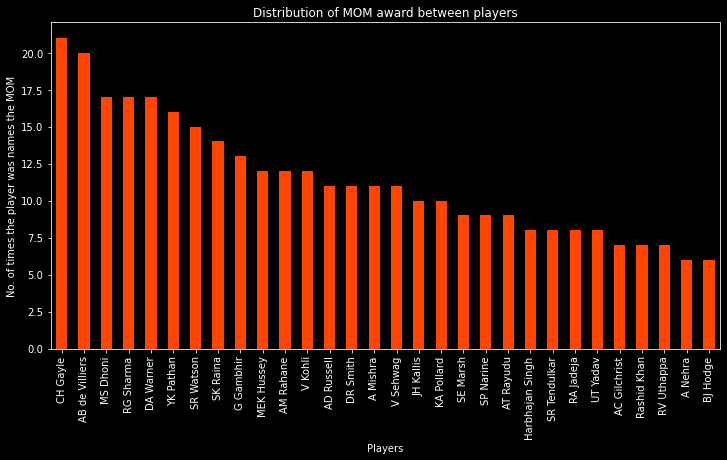

In [25]:
plt.style.use('dark_background') 
plt.figure(figsize = (12,6))
df['player_of_match'].value_counts().head(30).plot.bar(color = 'orangered')
plt.title('Distribution of MOM award between players')
plt.xlabel('Players')
plt.ylabel('No. of times the player was names the MOM')
plt.show()

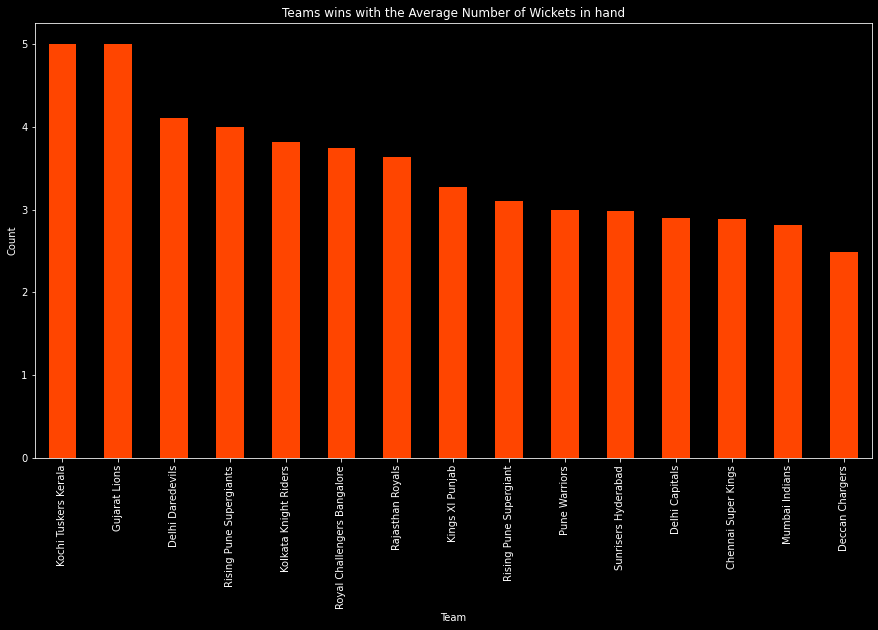

In [26]:
plt.figure(figsize = (15,8))
df.groupby(['winner'])['win_by_wickets'].mean().sort_values(ascending = False).plot.bar(color = 'orangered')
plt.title('Teams wins with the Average Number of Wickets in hand')
plt.xlabel('Team')
plt.ylabel('Count')
plt.show()

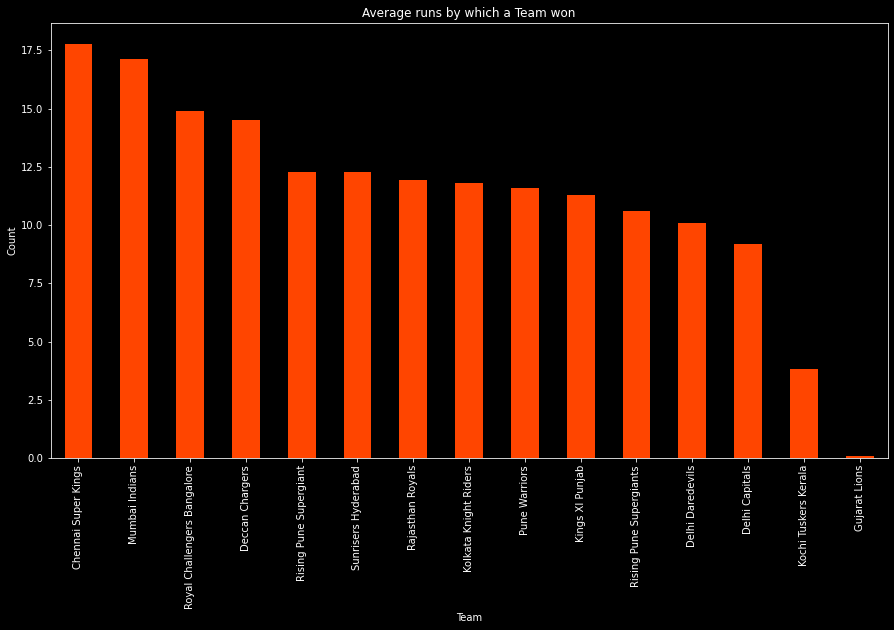

In [27]:
plt.figure(figsize = (15,8))
df.groupby(['winner'])['win_by_runs'].mean().sort_values(ascending = False).plot.bar(color = 'orangered')
plt.title('Average runs by which a Team won')
plt.xlabel('Team')
plt.ylabel('Count')
plt.show()

Conclusion
---
With this, we come to an end to this notebook and i would like to make the following conclusions - <br>
* We first checked for null values in our data and we found that there were a few Null Values in our data but not so many that it would affect our analysis or visualizaztions. The most were 600+ in umpire3 column but we didnt use it in our analysis so it was okay to leave the null values like that.
* We began by checking the individual stats for a few famous teams i.e. Mumbai Indians, Chennai Super Kings and Royal Challengers Banglore. We checked information like the city that the macthes were played, who won, by how many runs or wickets the winner won and so on.
* We then defined a function 'team' which takes the team name as an argument and returns the relevant information such as the games won, the number of runs or wicket they won the game by and other such information. According to the graphs, we can conclude that most games were played in 2013 according to our data.
* We went on to check the number of matche that were played in each season of Indian Premiere League
* We also checked the toss decisions that the toss winners took,and most of the toss winners chose to field first.
* We then checked which team in our data had won the most toss. According to our visualizations, we found out Mumbai Indians won the toss most number of times followed by KKR and Chennai Super Kings.
* We took a look at the cities in which most matches were played and we found out Most matches were played in Mumbai and next in the table was Kolkata.
* We saw in the previous visualization that most games were played in Mumbai but when we take a look at the stadiums, we see that most games were played in Eden Gardens which is located in Kolkata. This means that there is a chance that some false entries were made in our data.
* We then checked for the Different match results we had in our data and there were 3 types of results that we had. On visualizing these, we saw most results were normal, which means the game ended with a winner. There were a few matches which ended in a tie. We also saw games with no result and that's because some games might have been cancelled due to weather conditions or some other reason that prevented the match from taking place.
* We checked for the decision by toss winners across the seasons and we can see that in the initial seasons the number of time the winners chose to bat first are more. But as the seasons went by, we can see that teams are choosing to field more on winning the toss. This might be because of the stadiums that they are playing in and the pitch and field conditions.
* We also compared the match results across the seasons to find out that most seasons had mostly normal resulst but in 2015 the number of No results were comparitively higher than the other seasons and this might be due to the climatic conditions during the year or maybe there were no proper records available for that seson.
* We looked at the teams that won the toss and went on to win the games as well and we saw that CSK won the most toss and games followed by MI and KKR.
* We looked at the teams that defeated others by big margins and checked for the teams that beat others by a margin of 100 runs. RCB were the ones who won the most number of games by a margin of 100 runs or more.
* We also took a look at the teams that were able to win a match with 8 wickets in hand and once again RCB was the top team.
* We then went on to check the info about the umpires. We have 3 categories of Umpires in our data. We checked for Top 10 Primary umpires followed by Top 10 Secondary Umpires.
* We then checked for the players with most Man of the Match awards and found out that Chris Gayle has the most MOM awards according to our data.
* We took a look at the average number of wickets that a team won the game by and found out a former team Kochi Tuskers, won most of the games with an average of 5 wickets in hand.
* Finally, we saw the average runs that the teams won the games by and we found out that CSK and MI won the games by average of 17 runs.

With this i conclude my Analysis on IPL data set.